### Check similarity of my daily processed files vs. ARCHER2 shared space hourly files

In [1]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.utils import fix_lon_range

In [2]:
dir1h = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/hourly/'
dir1hme = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/hourly_me/files/'
dir1d = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily/files/'
dir1dme = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily_202508/'

In [3]:
def grid_ERA5(year):

    dir1h = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/hourly/'
    dir1d = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily/files/processed/'
    
    variables = ['mtpr','msdwswrf','msdwlwrf','u10','v10','msl'] #['t2m','d2m','msr','mtpr','msdwswrf','msdwlwrf','u10','v10','msl']
    vlim = [1e-5, 1, 1, 1e-1, 1e-1, 1e-1]

    for v, var in enumerate(variables):
        fig, ax = plt.subplots(4,3, figsize=(24,15))
        ds1h = xr.open_mfdataset(glob.glob(f'{dir1h}{var}*{year}*')).sel(latitude=slice(-50,-80)).groupby('time.month').mean()
        ds1h['longitude'] = fix_lon_range(ds1h['longitude'])
        mask = xr.open_dataset(f'{dir1h}../ERA5-landmask.nc').isel(time=0).sel(latitude=slice(-50,-80)).lsm
        mask['longitude'] = fix_lon_range(mask['longitude'])
        ds1d = xr.open_mfdataset(glob.glob(f'{dir1d}{var}*{year}*')).sel(latitude=slice(-50,-80)).groupby('time.month').mean()

        diff = (ds1h[var].sortby('longitude') - ds1d[var]).where(mask==0)

        for m,axis in enumerate(ax.ravel()):
            diff.isel(month=m).plot(ax=axis, cmap=cmocean.cm.balance, vmin=-1*vlim[v], vmax=vlim[v])
            fig.savefig(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/figures/difference_{var}_1h-1d_y{year}.jpg')
            
    return fig, ax

In [ ]:
fig, ax = grid_ERA5(1979)

In [4]:
var='mtpr'
ds1hme = xr.open_mfdataset(glob.glob(f'{dir1hme}{var}*1979*')).rename({'avg_tprate':'mtpr'}).sel(latitude=slice(-50,-80))
# ds1dn  = ds1hme.shift(valid_time=1) #.sel(valid_time=(ds1hme.valid_time.dt.month==9))

In [36]:
daily_mean_1h_noshift = ds1hme.isel(valid_time=slice(744,1416)).mean(dim='valid_time')
daily_mean_1h_shift = ds1hme.isel(valid_time=slice(745,1417)).mean(dim='valid_time')

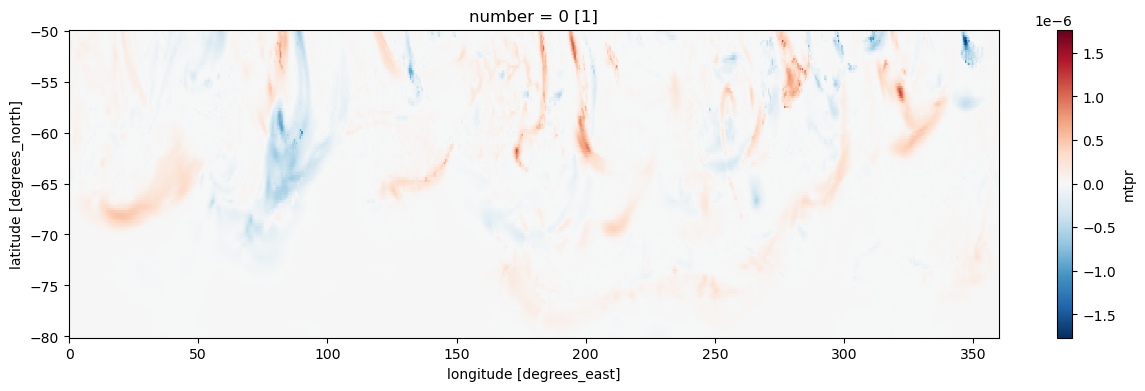

In [38]:
(daily_mean_1h_shift - daily_mean_1h_noshift).mtpr.sortby('longitude').plot(figsize=(15,4))

# ds1 = ds1hme.sel(valid_time=(ds1hme.valid_time.dt.month==9))
# ds2 = ds1hme.shift(valid_time=1)
# ds1.valid_time.sel(valid_time=(ds1.valid_time.dt.month==9))
# ds1dn  = ds1hme.shift(valid_time=1).sel(valid_time=(ds1hme.valid_time.dt.month==9))

In [5]:
var    ='mtpr'
ds1h   = xr.open_mfdataset(glob.glob(f'{dir1h}{var}*1979*')).sel(latitude=slice(-50,-80))
ds1h   = ds1h.sel(time=(ds1h.time.dt.month==9)).mean(dim='time')
ds1hme = xr.open_mfdataset(glob.glob(f'{dir1hme}{var}*1979*')).sel(latitude=slice(-50,-80))
ds1hme = ds1hme.sel(valid_time=(ds1hme.valid_time.dt.month==9)).mean(dim='valid_time').rename({'avg_tprate':'mtpr'})
ds1dn  = ds1hme.shift(valid_time=1).sel(valid_time=(ds1hme.valid_time.dt.month==9)).mean(dim='valid_time').rename({'avg_tprate':'mtpr'})
ds1d   = xr.open_mfdataset(glob.glob(f'{dir1d}{var}*1979*')).sel(latitude=slice(-50,-80))
ds1d   = ds1d.sel(valid_time=(ds1d.valid_time.dt.month==9)).mean(dim='valid_time')
ds1dme = xr.open_mfdataset(glob.glob(f'{dir1dme}{var}*1979*')).sel(latitude=slice(-50,-80)).rename({'avg_tprate':'mtpr'})
ds1dme = ds1dme.sel(valid_time=(ds1dme.valid_time.dt.month==9)).mean(dim='valid_time')
mask   = xr.open_dataset(f'{dir1h}../ERA5-landmask.nc').isel(time=0).sel(latitude=slice(-50,-80)).lsm
ds1h['longitude'] = fix_lon_range(ds1h['longitude'])
ds1hme['longitude'] = fix_lon_range(ds1hme['longitude'])
mask['longitude'] = fix_lon_range(mask['longitude'])

In [6]:
diff1 = (ds1h[var].sortby('longitude') - ds1d[var]).where(mask==0)
diff2 = (ds1hme[var].sortby('longitude') - ds1h[var]).where(mask==0)
diff3 = (ds1dme[var].sortby('longitude') - ds1d[var]).where(mask==0)

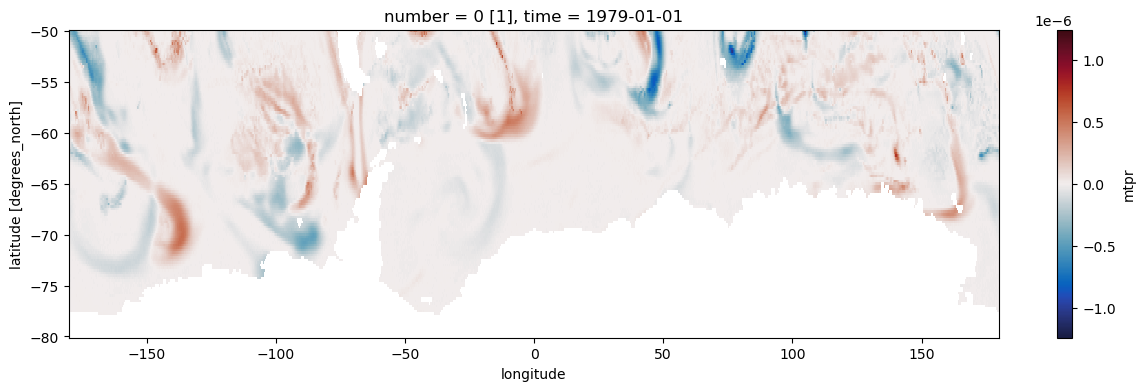

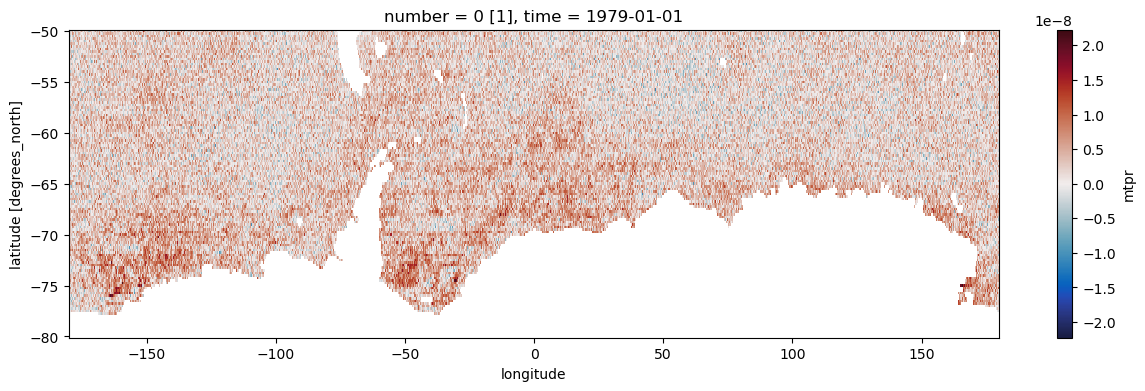

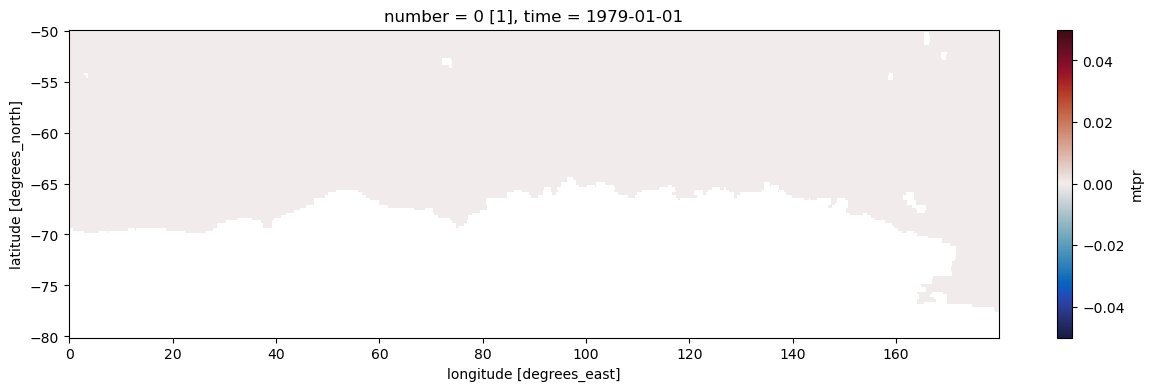

In [14]:
# ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
ds1h[var].sortby('longitude').where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff1.plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff2.plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff3.plot(figsize=(15,4), cmap=cmocean.cm.balance)

In [ ]:
ds1h[var].sortby('longitude').where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)

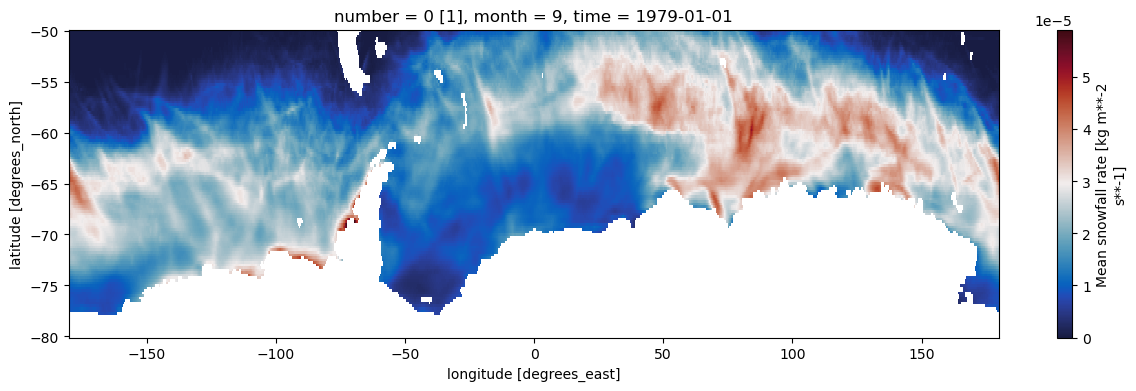

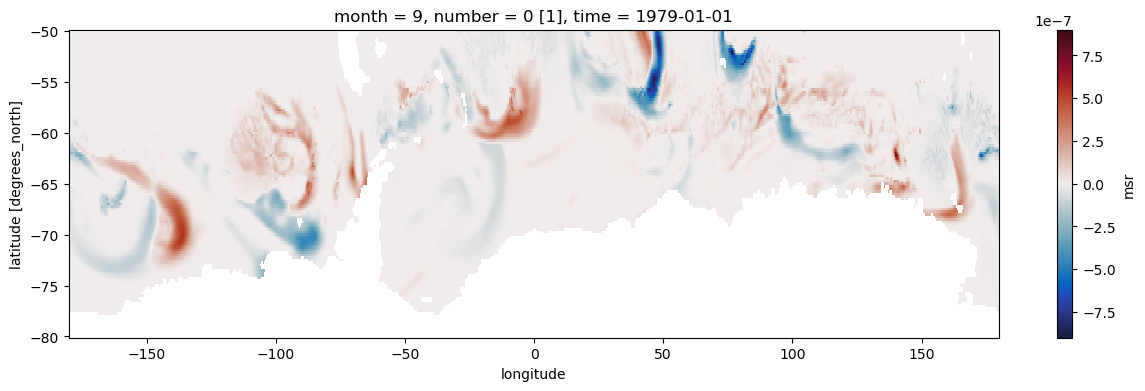

In [5]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

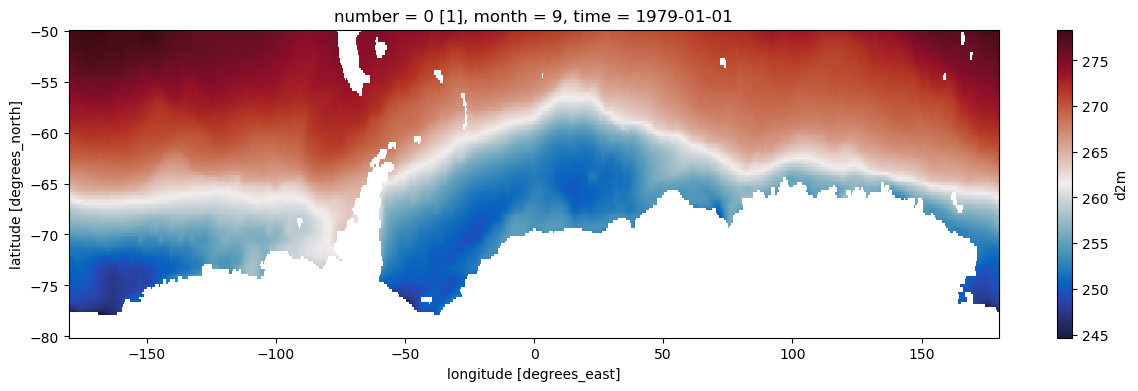

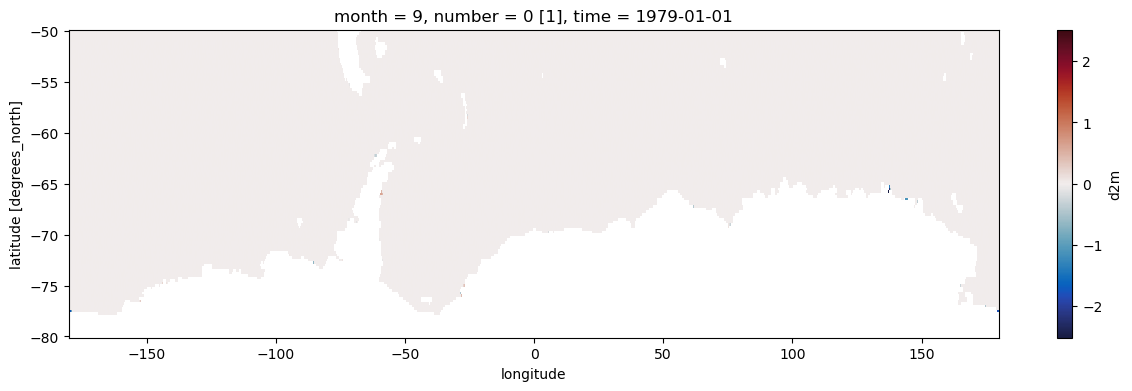

In [23]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

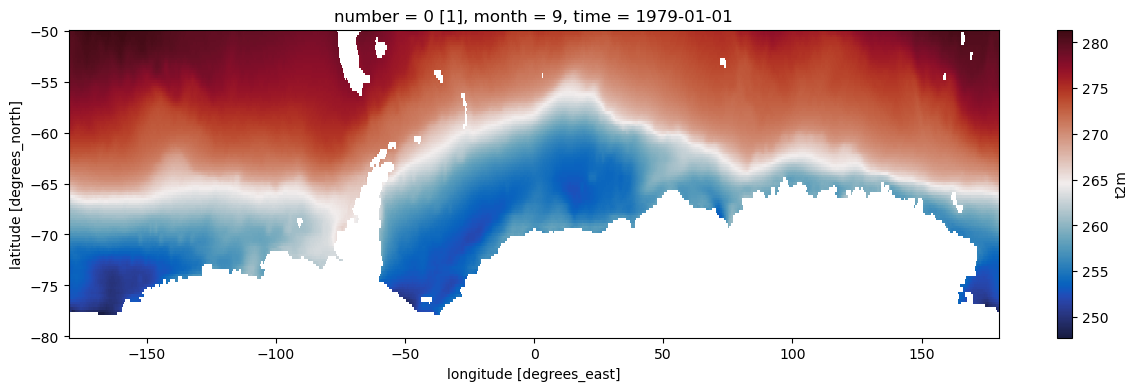

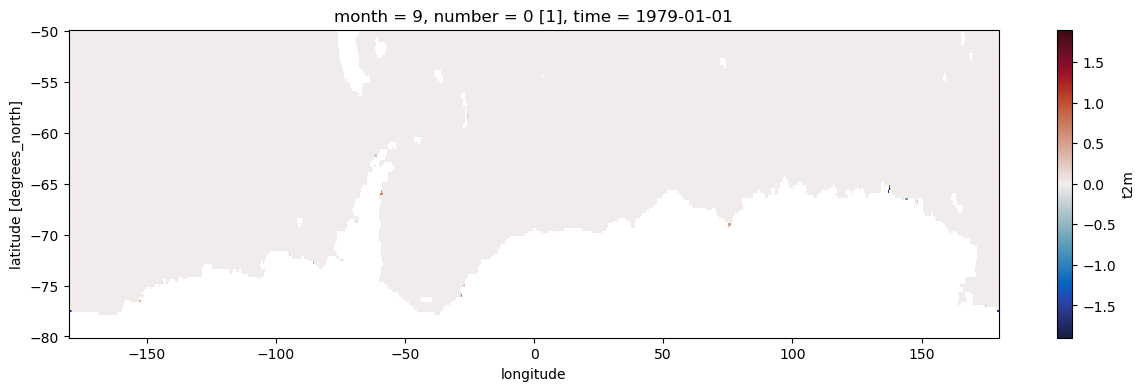

In [26]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

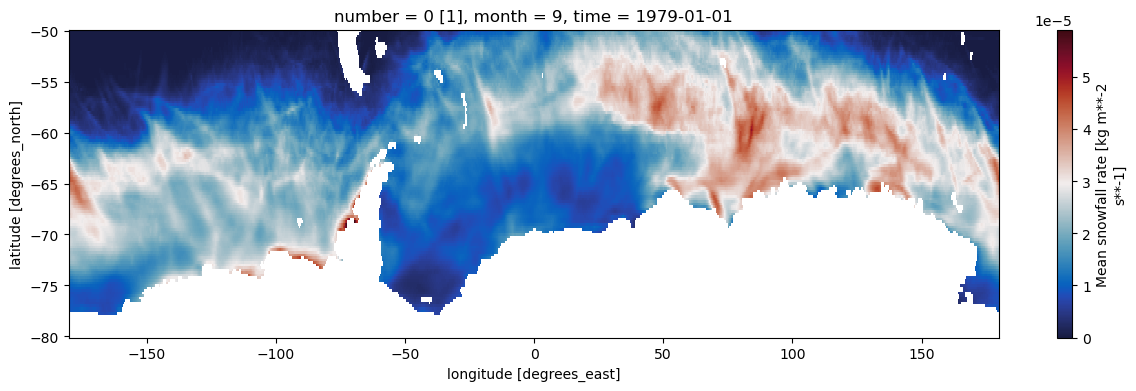

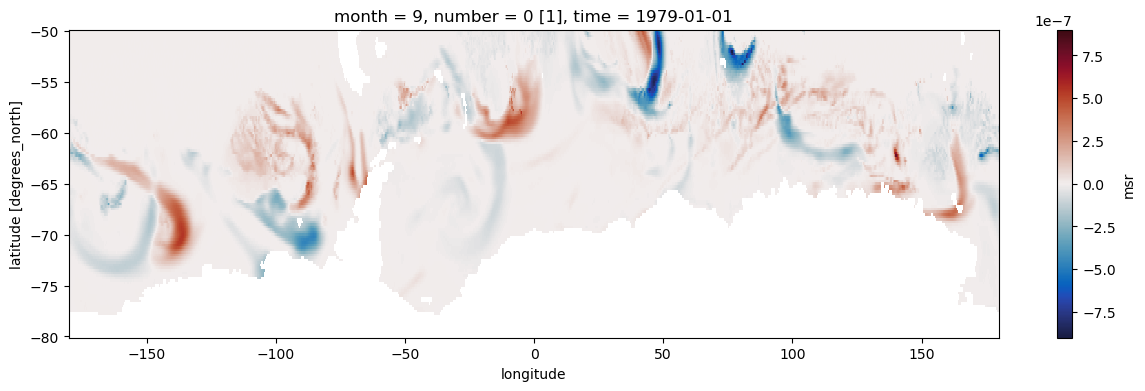

In [5]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

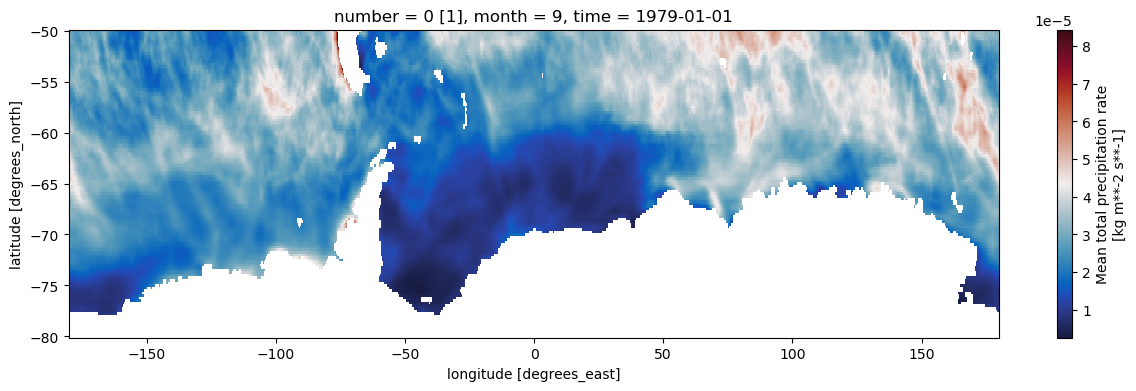

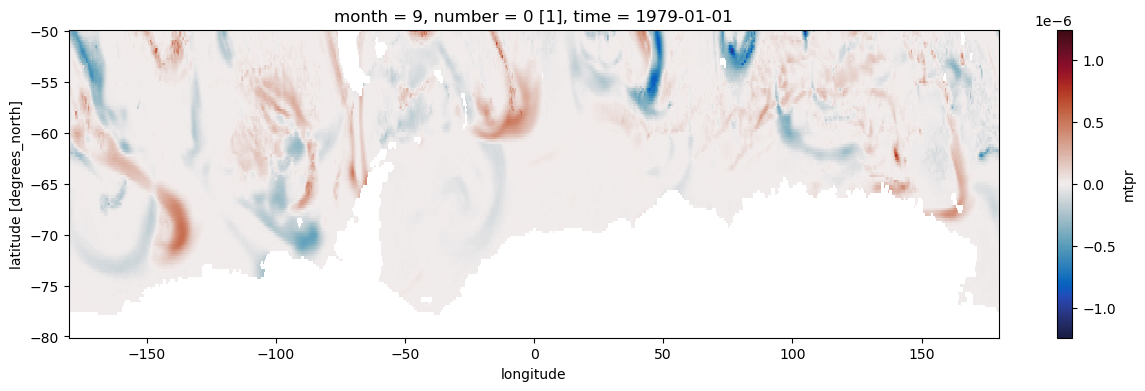

In [8]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

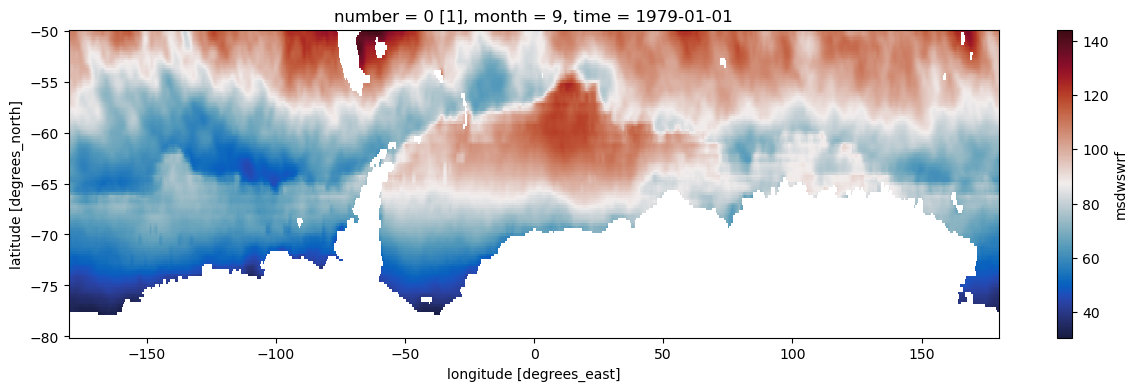

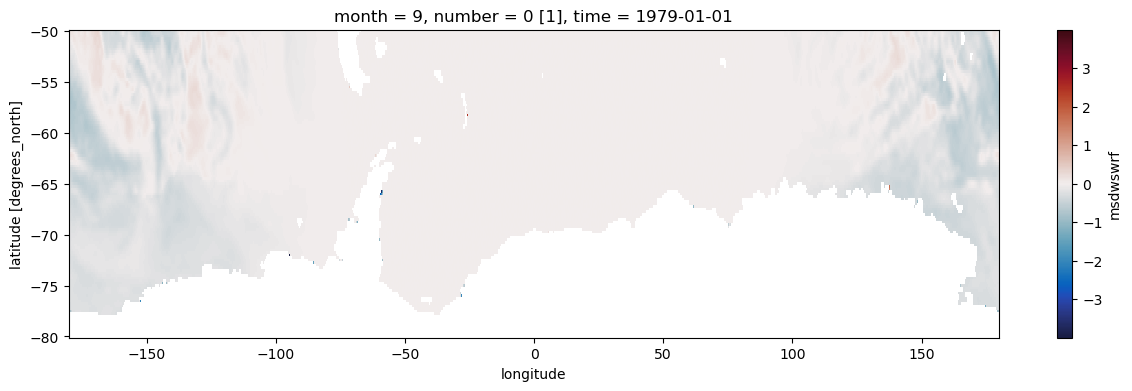

In [11]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

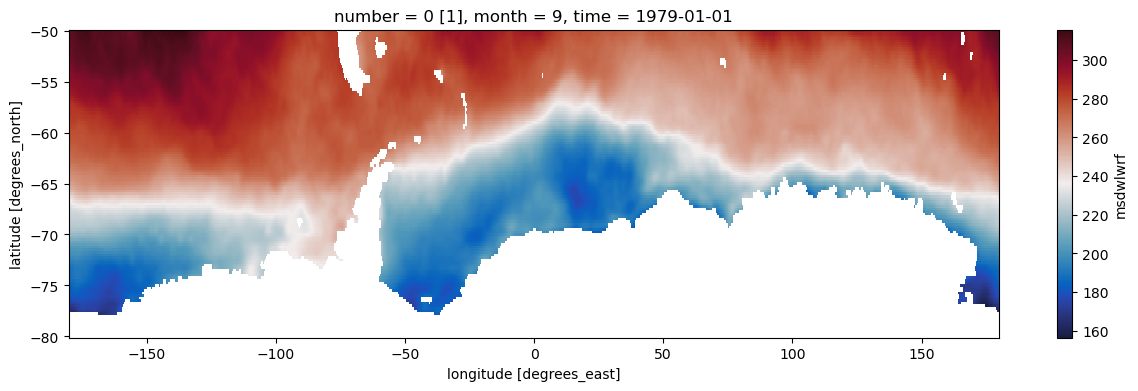

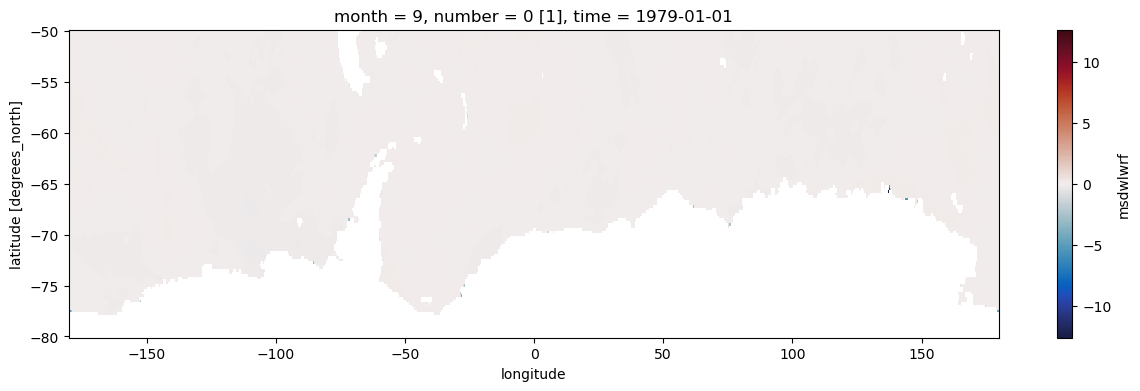

In [14]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

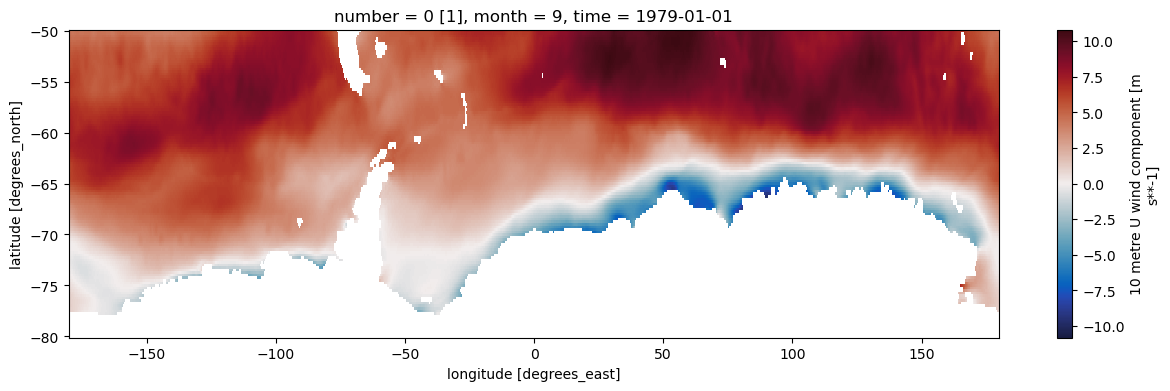

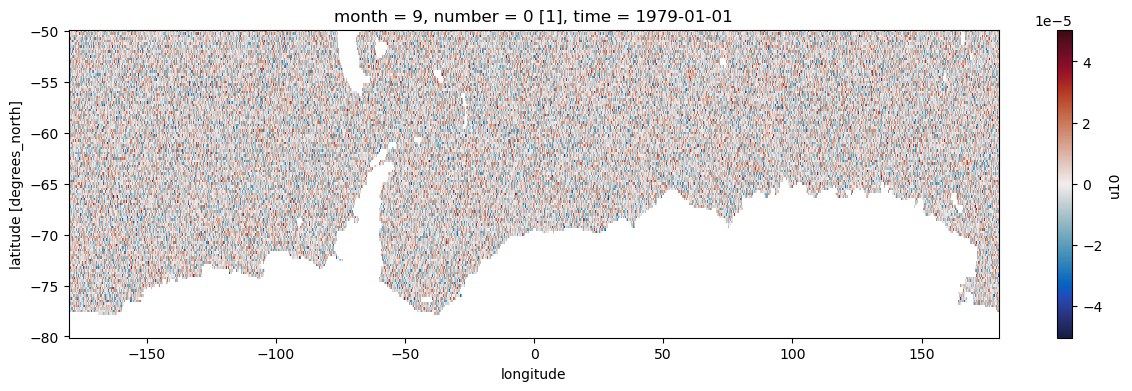

In [17]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)

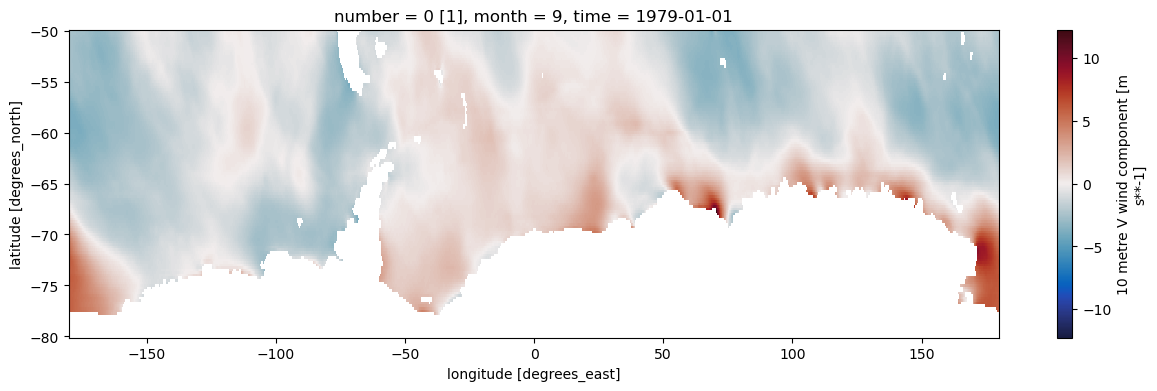

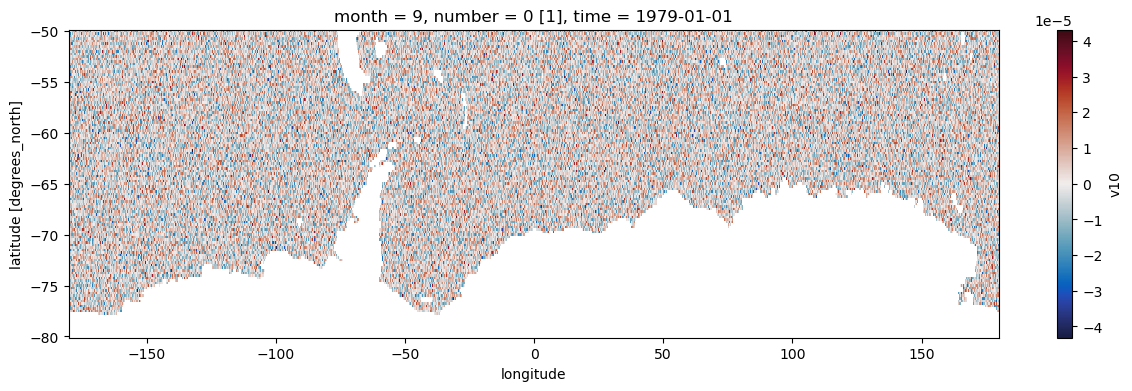

In [20]:
ts=8
ds1d[var].isel(month=ts).where(mask==0).plot(figsize=(15,4), cmap=cmocean.cm.balance)
diff.isel(month=ts).plot(figsize=(15,4), cmap=cmocean.cm.balance)